<a href="https://colab.research.google.com/github/haiderali2017/my_exploratory_data_analyses/blob/main/Data_Indicator_2_Employment_By_Sector_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('https://data.smartdublin.ie/dataset/4997223b-13b2-4c97-9e88-cd94c6d35aec/resource/b12a5b77-37dd-4e3f-bb4b-199ba35e94a5/download/indicator-2-employment-indicator-v3.csv')

# Data Exploration


In [ ]:
df.head()

,Unnamed: 0,Dublin Employment ('000) - Construction (F),"Dublin Employment ('000) - Wholesale and retail trade, repair of motor vehicles and motorcycles (G)",Dublin Employment ('000) - Transportation and storage (H),Dublin Employment ('000) - Accommodation and food service activities (I),Unnamed: 5,Dublin Employment ('000) - Information and communication (J),"Dublin Employment ('000) - Professional, scientific and technical activities (M)",Dublin Employment ('000) - Administrative and support service activities (N),"Dublin Employment ('000) - Public administration and defence, compulsory social security (O)",...,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,Q1 98,24.0,73.7,29.0,31.8,False,36.484827,35.2,23.589445,28.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Q2 98,24.3,73.9,29.6,31.3,False,37.318013,36.0,23.378097,27.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Q3 98,25.0,75.6,31.0,33.5,False,38.919939,36.3,24.107732,26.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Q4 98,26.2,72.0,32.2,30.8,False,39.588693,37.5,23.635331,26.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Q1 99,27.1,73.1,33.6,33.5,False,42.236277,37.7,23.713206,28.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 30 columns):
 #   Column                                                                                               Non-Null Count  Dtype  
---  ------                                                                                               --------------  -----  
 0   Unnamed: 0                                                                                           107 non-null    object 
 1   Dublin Employment ('000) - Construction (F)                                                          107 non-null    float64
 2   Dublin Employment ('000) - Wholesale and retail trade, repair of motor vehicles and motorcycles (G)  107 non-null    float64
 3   Dublin Employment ('000) - Transportation and storage (H)                                            107 non-null    float64
 4   Dublin Employment ('000) - Accommodation and food service activities (I)                             107 non-n

In [ ]:
df['Unnamed: 5'].unique()

array([False, True, nan], dtype=object)

Looking at the dataset, it is evident that it requires a lot of cleaning.


*   The first column defines Quarter of the year but it is unnamed.
*   There are so many unnamed columns with empty cells. They can be dropped.
* Names of the columns can be worked down to smaller names.
* An unnamed column at 6th position from left bears only two types of values in it. True and False. This unnamed column does not give any meaning. Hence, it can also be removed.

# Data Cleaning


1.   Renaming columns
2. Dropping empty columns
3. Removing missing values



### 1. Renaming column

In [ ]:
df_renamed_columns = df.rename(columns={"Unnamed: 0": "Quarter",
                                        "Dublin Employment ('000) - Construction (F)": "Construction",
                                        "Dublin Employment ('000) - Wholesale and retail trade, repair of motor vehicles and motorcycles (G)": "Wholesale and retail trade, repair of motor vehicles and motorcycles",
                                        "Dublin Employment ('000) - Transportation and storage (H)": "Transportation and storage",
                                        "Dublin Employment ('000) - Accommodation and food service activities (I)": "Accommodation and food service activities",
                                        "Dublin Employment ('000) - Information and communication (J)": "Information and communication",
                                        "Dublin Employment ('000) - Professional, scientific and technical activities (M)": "Professional, scientific and technical activities",
                                        "Dublin Employment ('000) - Administrative and support service activities (N)": "Administrative and support service activities",
                                        "Dublin Employment ('000) - Public administration and defence, compulsory social security (O)": "Public administration and defence, compulsory social security",
                                        "Dublin Employment ('000) - Education (P)": "Education",
                                        "Dublin Employment ('000) - Human health and social work activities (Q)": "Human health and social work activities",
                                        "Dublin Employment ('000) - Industry (B to E)": "Industry",
                                        "Dublin Employment ('000) - Industry and Construction (B to F)": "Industry and Construction",
                                        "Dublin Employment ('000) - Services (G to U)": "Services",
                                        "Dublin Employment ('000) - Financial, insurance and real estate activities (K,L)": "Financial, insurance and real estate activities",
                                        "Dublin Employment ('000) - Other NACE activities (R to U)": "Other NACE activities",
                                        "Dublin Employment ('000) - Not stated": "Not stated",
                                        })

### 2. Dropping empty columns

In [ ]:
df_dropped_columns = df_renamed_columns.drop(['Unnamed: 5'], axis=1) # dropping this column as it didn't contribute much to the dataset
df_dropped_columns = df_dropped_columns.drop(columns=[f'Unnamed: {i}' for i in range(20, 30)], errors='ignore') # dropping last columns - they contain only NaNs

### 3. Removing missing values

In [ ]:
df_removed_nan = df_dropped_columns.dropna().reset_index(drop=True)
df = df_removed_nan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 19 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Quarter                                                               48 non-null     object 
 1   Construction                                                          48 non-null     float64
 2   Wholesale and retail trade, repair of motor vehicles and motorcycles  48 non-null     float64
 3   Transportation and storage                                            48 non-null     float64
 4   Accommodation and food service activities                             48 non-null     float64
 5   Information and communication                                         48 non-null     float64
 6   Professional, scientific and technical activities                     48 non-null     float64
 7   A

After performing all the necessary data cleaning steps, our dataset is in much better state. The data size has shrunk down to 19 columns and 48 records. The column names have been resized too. The next step is not data cleaning step but changing Quarter column. Splitting Quarter column into years so that it helps in generating insightful visualisations.

# Data Visualisation


In [ ]:
df.head()

,Quarter,Construction,"Wholesale and retail trade, repair of motor vehicles and motorcycles",Transportation and storage,Accommodation and food service activities,Information and communication,"Professional, scientific and technical activities",Administrative and support service activities,"Public administration and defence, compulsory social security",Education,Human health and social work activities,Industry,Industry and Construction,Services,"Financial, insurance and real estate activities",Other NACE activities,Not stated,Private Sector,Total
0,Q1 12,16.8,75.3,30.3,31.6,44.7,43.4,25.2,25.2,39.8,77.5,39.9,56.8,482.9,52.3,37.4,0.0,400.4,539.7
1,Q2 12,16.1,77.5,30.8,30.5,45.7,48.7,25.6,26.0,40.5,77.9,38.9,55.0,492.1,50.7,38.1,0.0,404.5,547.1
2,Q3 12,15.4,76.7,30.8,33.2,43.0,47.2,28.4,27.2,36.0,80.6,38.8,54.2,494.4,53.1,38.2,0.0,408.4,548.6
3,Q4 12,15.6,78.8,30.3,33.8,45.2,48.4,28.4,27.0,36.4,80.1,42.4,58.0,498.5,54.7,35.3,0.0,416.0,556.5
4,Q1 13,14.3,78.6,29.2,35.9,41.7,47.3,26.6,26.2,34.7,82.5,40.2,54.5,492.1,54.3,35.3,0.0,406.1,546.6


In the following 2 steps, I will create another dataframe from the original dataset. It will include Year and all 16 employment sectors. Those employment sector columns will contain average of all 4 quarters of each year.

In [ ]:
# new DataFrame
df_emp = pd.DataFrame()

# split quarter from year (from original dataset) and put it into newly initialized dataframe
df_emp['Year'] = df_removed_nan['Quarter'].str.split(' ').str[-1]

# add 20 with year to make it '2012'
df_emp.loc[:, 'Year'] = '20' + df_emp['Year']

# converting the type of year column from object to int.
#  the purpose is to have correct line plot
df_emp['Year'] = df_emp['Year'].astype(str).astype(int)

# removing duplicate rows
df_emp = df_emp.drop_duplicates()

# want df_emp to have a fresh index starting from 0
df_emp.reset_index(drop=True, inplace=True)

In [ ]:
# Extract column names of the DataFrame
column_names = list(df.columns)

# Loop over the sectors (excluding the first column and the last three columns)
for sectors in column_names[1:-3]:
  # Create a list to store the mean values for each quarter
  mean_values = []

  # Iterate over the quarters 12 to 23
  for i in range(12,24):

    # Filter the rows where the 'Quarter' column contains the current quarter (i)
    # and extract the corresponding values for the current sector
    values = df.loc[df['Quarter'].str.contains(str(i), na=False), sectors]
    # Calculate the mean of the filtered values
    val = values.mean()
    # Append the calculated mean to the mean_values list
    mean_values.append(val)

  # Add the list of mean values to a new dataframe 'df_emp' with the sector name as the column name
  df_emp[sectors] = mean_values

df_emp

,Year,Construction,"Wholesale and retail trade, repair of motor vehicles and motorcycles",Transportation and storage,Accommodation and food service activities,Information and communication,"Professional, scientific and technical activities",Administrative and support service activities,"Public administration and defence, compulsory social security",Education,Human health and social work activities,Industry,Industry and Construction,Services,"Financial, insurance and real estate activities",Other NACE activities
0,2012,15.975,77.075,30.550,32.275,44.650,46.925,26.900,26.350,38.175,79.025,40.000,56.000,491.975,52.700,37.250
1,2013,17.325,77.975,30.050,40.300,46.575,50.300,26.525,27.550,36.575,80.075,41.475,58.825,504.200,52.450,35.875
2,2014,18.325,80.325,31.525,44.850,51.125,52.100,27.100,28.600,41.525,79.800,42.450,60.775,527.350,55.450,34.950
3,2015,21.475,82.825,30.975,48.450,53.075,52.575,30.050,28.850,40.450,78.575,46.575,68.000,541.650,55.125,40.750
4,2016,25.600,81.050,34.875,49.950,56.800,55.250,32.525,31.300,40.775,79.025,53.200,78.850,559.100,57.450,40.175
5,2017,29.475,85.325,35.200,47.725,61.500,56.375,34.100,29.475,45.950,83.025,48.450,77.900,574.375,57.425,38.375
6,2018,32.050,91.500,37.700,52.450,64.225,57.900,36.975,35.600,48.925,83.675,46.225,78.275,606.000,55.375,41.600
7,2019,33.725,88.125,40.350,53.675,69.000,58.875,38.100,39.075,56.350,85.850,46.900,80.600,627.325,60.800,37.200
8,2020,30.675,84.475,38.600,35.575,72.775,62.725,33.650,37.800,56.775,89.250,48.400,79.025,602.400,62.525,28.275
9,2021,28.750,88.050,36.200,39.725,79.850,71.075,31.575,42.125,59.825,91.100,59.025,87.800,638.125,67.200,31.375


### Visualisation # 1 - People employed in each sector in Dublin

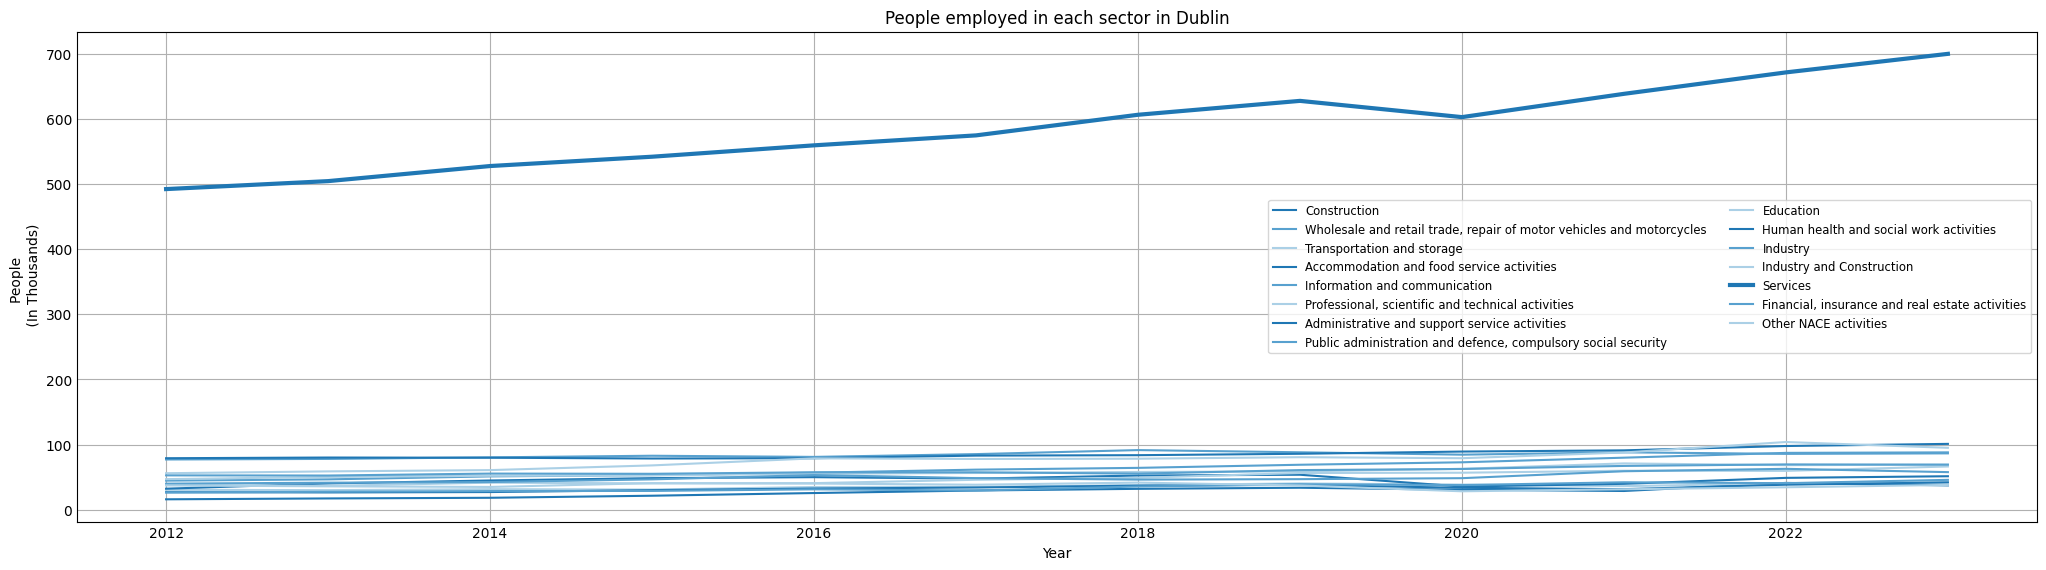

In [ ]:
plt.figure(figsize=(20, 5)) # Width x Height
# Loop through each sector (column) in df_emp and plot each one
for sector in df_emp.columns[1:]:  # Skipping the 'Year' column
    if sector == 'Services':
      # Identify services sector and make the line width thick
      plt.plot(df_emp['Year'], df_emp[sector], label=sector, linewidth=3)
    else:
      plt.plot(df_emp['Year'], df_emp[sector], label=sector)
plt.title("People employed in each sector in Dublin")
# Ensure all years are displayed
plt.xlabel("Year")
plt.ylabel("People \n (In Thousands)")
# Display the legend for each sector
plt.legend(loc='best', fontsize='small', ncol=2)
plt.show()

The above visualisation clearly shows that **Services** sector outweighs all other employment sectors in Dublin.

### Visualisation # 2 - People employed in a particular sector in Dublin

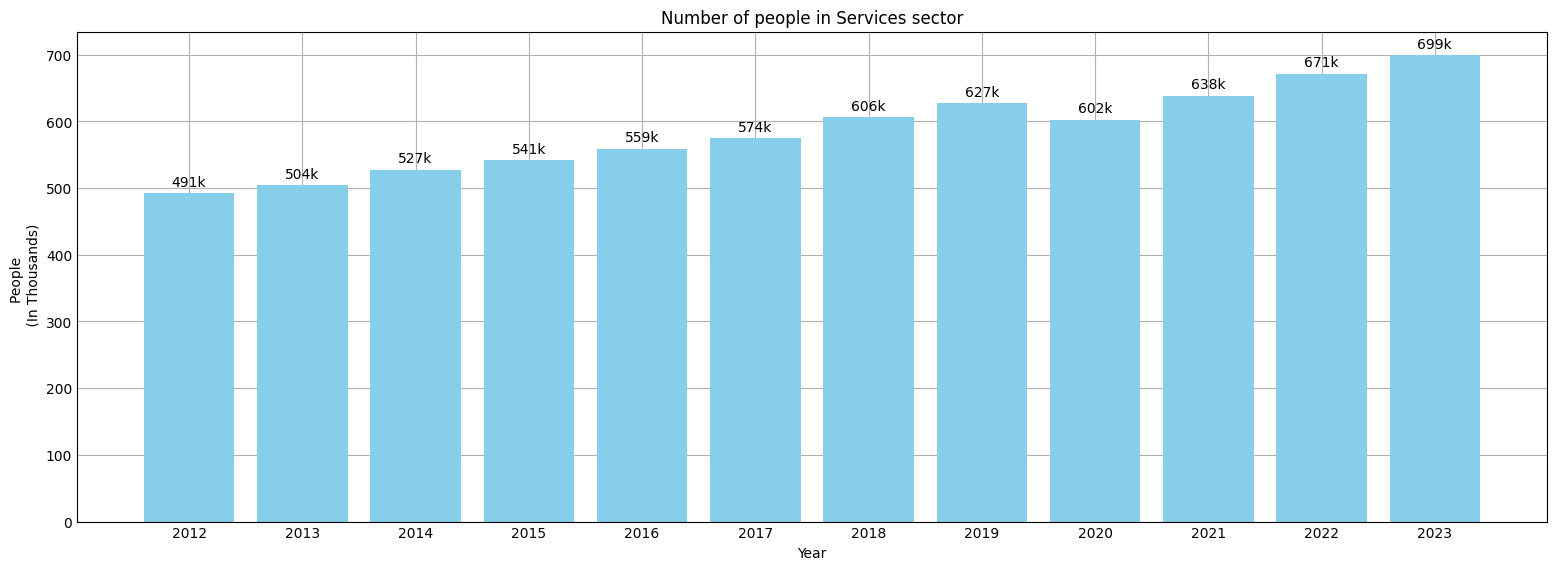

In [ ]:
desired_sector = 'Services'
#  'Construction',
#  'Wholesale and retail trade, repair of motor vehicles and motorcycles',
#  'Transportation and storage',
#  'Accommodation and food service activities',
#  'Information and communication',
#  'Professional, scientific and technical activities',
#  'Administrative and support service activities',
#  'Public administration and defence, compulsory social security',
#  'Education',
#  'Human health and social work activities',
#  'Industry',
#  'Industry and Construction',
#  'Services',
#  'Financial, insurance and real estate activities',
#  'Other NACE activities'


# Create figure and axis
fig, ax = plt.subplots(figsize=(15, 5))

# Create bar chart
bars = ax.bar(df_emp['Year'], df_emp[desired_sector], color='skyblue')

# Add labels to each bar
ax.bar_label(bars, fmt='%dk', padding=3)

# Ensure all years are displayed
ax.set_xticks(df_emp['Year'])  # Set x-axis ticks to include all years


# Customize the chart
ax.set_xlabel("Year")
ax.set_ylabel('People \n (In Thousands)')
ax.set_title(f'Number of people in {desired_sector} sector')

# Show plot
plt.show()

### Visualisation # 3 - Distribution and changes in various employment sectors

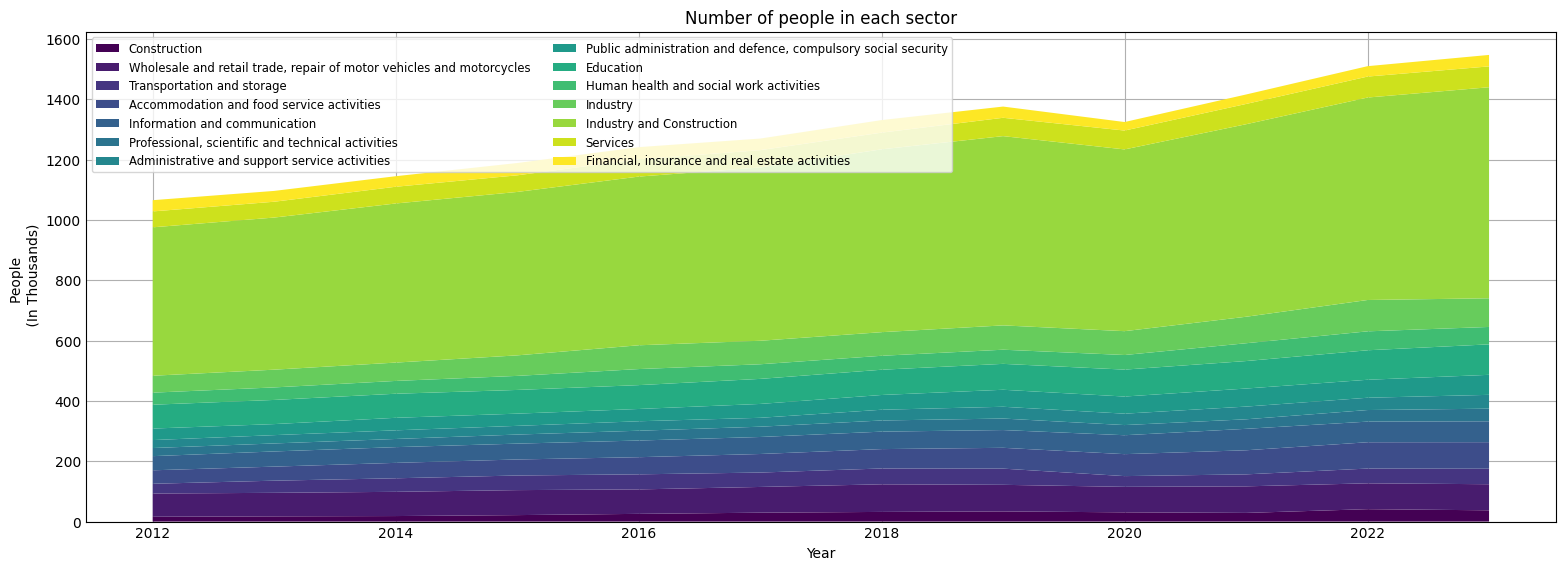

In [ ]:
import matplotlib.cm as cm

plt.style.use('_mpl-gallery')

# make data
x = df_emp['Year']
ay = df_emp['Construction']
by = df_emp['Wholesale and retail trade, repair of motor vehicles and motorcycles']
cy = df_emp['Accommodation and food service activities']
dy = df_emp['Information and communication']
ey = df_emp['Professional, scientific and technical activities']
fy = df_emp['Administrative and support service activities']
gy = df_emp['Public administration and defence, compulsory social security']
hy = df_emp['Education']
iy = df_emp['Human health and social work activities']
jy = df_emp['Industry']
ky = df_emp['Industry and Construction']
ly = df_emp['Services']
my = df_emp['Financial, insurance and real estate activities']
ny = df_emp['Other NACE activities']

y = np.vstack([ay, by, cy, dy, ey, fy, gy, hy, iy, jy, ky, ly, my, ny])

# Use a colormap to generate a sufficient number of colors
num_colors = y.shape[0]  # Number of categories
colors = cm.viridis(np.linspace(0, 1, num_colors))  # Choose a color map, e.g., viridis

# plot
fig, ax = plt.subplots(figsize=(15, 5))

# Add labels to each stacked area
ax.stackplot(x, y, labels=column_names[1:], colors=colors)

# Add legend
ax.legend(loc='upper left', fontsize='small', ncol=2)

ax.set_xlabel("Year")
ax.set_ylabel("People \n (In Thousands)")
ax.set_title("Number of people in each sector")

plt.show()

The above visualisation is a stackplot. Stackplot helps illustrate how individual elements change in relation to one another and how they contribute to the overall sum.

In the above visualisation, it is evident that
1. **Services** industry holds the most number of people.
2. In 2012, overall number of people employed in Dublin sums to little over 1,000,000 and by year 2023, they reach 1,500,000.  

